# Tensorflow classification example using MNIST dataset

MNIST dataset comes with tensorflow machine learning framework. The dataset has images of 28x28 pixel handwritten digits.

More details: https://www.tensorflow.org/versions/r1.2/get_started/mnist/beginners

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/Users/isurujayarathne/miniconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Define function for create layers

In [2]:
def add_layer(inputs, in_size, out_size, act_func=None):
    weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size])+ 0.1)
    Func = tf.add(tf.matmul(inputs, weights), biases)
    if act_func is None:
        outputs = Func
    else:
        outputs = act_func(Func)
    return outputs

### Define function for calculate accuracy 

In [3]:
def get_accuracy(xs, ys):
    global pred
    ypred = sess.run(pred, feed_dict={X:xs})
    correct_pred = tf.equal(tf.argmax(ypred,1), tf.argmax(ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    result = sess.run(accuracy, feed_dict={X:xs, Y:ys})
    return result

### Import MNIST dataset from tensorflow examples

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Show the data as images

Image is in 784 elements array in the MNIST dataset. If the data needs to be shown as a image, the array has to be coverted into 28x28 matrix. **.reshape((28,28))** function can be used to create a matrix and matrix can be converted into image using **imshow()** function in matplotlib package.

Each label represent as an array with 10 elements. Corresponding element for the image is "1" others are "0" in each array. 

Label for image1 : 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Label for image2 : 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Label for image3 : 
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Label for image4 : 
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Label for image5 : 
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Label for image6 : 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Label for image7 : 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Label for image8 : 
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Label for image9 : 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Label for image10 : 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


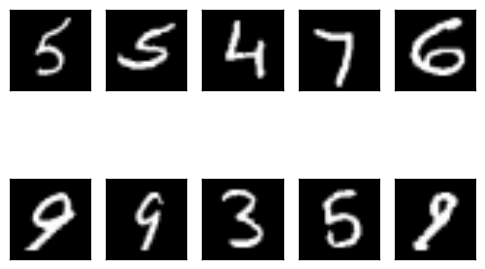

In [5]:
data, labels = mnist.train.next_batch(10)
fig, pltar = plt.subplots(2,5)
plt.gray()
for i in range(10):   
    # Remove axes and tickers
    pltar[(i//5),(i%5)].xaxis.set_major_locator(plt.NullLocator())
    pltar[(i//5),(i%5)].yaxis.set_major_locator(plt.NullLocator())
    # Display the matrix as a image
    pltar[(i//5),(i%5)].imshow(data[i,:].reshape((28,28)))
    print 'Label for image' + `(i+1)` + ' : '
    print(labels[i,:])

### Set placeholders for feed data

In [6]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

### Create a layer with softmax activation function

In [7]:
pred = add_layer(X, 784, 10, act_func=tf.nn.softmax)

### Define the cost function and optimizer

In [8]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(pred), reduction_indices=[1]))
optimizer = tf.train.GradientDescentOptimizer(0.6).minimize(cross_entropy)

### Initialize the training process 

In [9]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(2500):
    xbatch, ybatch = mnist.train.next_batch(500)
    sess.run(optimizer, feed_dict={X: xbatch, Y:ybatch})
    if i%100 == 0:
        print (get_accuracy(mnist.test.images, mnist.test.labels))

print('Accuracy of the trained model is ' + `get_accuracy(mnist.test.images, mnist.test.labels)*100` + '%')


0.0909
0.7611
0.817
0.8397
0.8514
0.8597
0.8682
0.8728
0.8758
0.8777
0.8828
0.8827
0.8841
0.8875
0.8878
0.8899
0.8906
0.8925
0.8942
0.8947
0.8951
0.8957
0.8977
0.8953
0.8982
Accuracy of the trained model is 89.92000222206116%


### Test the trained model with one data

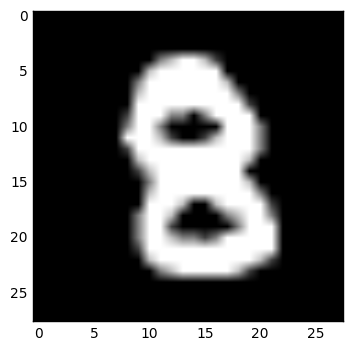

In [10]:
test_data, tlabel = mnist.test.next_batch(1)
plt.imshow(test_data.reshape((28,28)))
plt.gray()
plt.show()

In [11]:
pred_value = sess.run(pred, feed_dict={X:test_data})
print('Predicted value is ' + `np.argmax(pred_value)`)

Predicted value is 8
